In [1]:
!pip install tensorflow_datasets

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

### Read the Dataset: IMDB reviews

In [3]:
help(tfds.load)

Help on function load in module tensorflow_datasets.core.load:

load(name: 'str', *, split: 'Optional[Tree[splits_lib.SplitArg]]' = None, data_dir: 'Union[None, str, os.PathLike]' = None, batch_size: 'Optional[int]' = None, shuffle_files: 'bool' = False, download: 'bool' = True, as_supervised: 'bool' = False, decoders: 'Optional[TreeDict[decode.partial_decode.DecoderArg]]' = None, read_config: 'Optional[read_config_lib.ReadConfig]' = None, with_info: 'bool' = False, builder_kwargs: 'Optional[Dict[str, Any]]' = None, download_and_prepare_kwargs: 'Optional[Dict[str, Any]]' = None, as_dataset_kwargs: 'Optional[Dict[str, Any]]' = None, try_gcs: 'bool' = False)
    Loads the named dataset into a `tf.data.Dataset`.
    
    `tfds.load` is a convenience method that:
    
    1. Fetch the `tfds.core.DatasetBuilder` by name:
    
       ```python
       builder = tfds.builder(name, data_dir=data_dir, **builder_kwargs)
       ```
    
    2. Generate the data (when `download=True`):
    
       

In [4]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [5]:
train_data, test_data = imdb['train'], imdb['test']

In [6]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [7]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [8]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [9]:
training_sentences

['b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."',
 "b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot devel

In [10]:
len(training_sentences)

25000

In [11]:
training_labels

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,


In [12]:
len(testing_labels)

25000

In [13]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='C:\\Users\\Administrator.DAI-PC2\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_exam

In [14]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [15]:
len(training_labels), len(testing_labels)

(25000, 25000)

In [16]:
training_labels_final.size, testing_labels_final.size

(25000, 25000)

In [17]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [19]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index; # Semi-colon is used for two purposes: Suppressng the Output and Stop Chaining Commands
len(word_index)

86538

In [20]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

In [21]:
len(training_sequences)

25000

In [22]:
len(training_sequences[0])

110

In [23]:
len(training_padded[0])

120

In [24]:
training_padded.shape, testing_padded.shape

((25000, 120), (25000, 120))

In [25]:
training_padded.dtype, testing_padded.dtype #

(dtype('int32'), dtype('int32'))

### Build the SimpleRNN Model

In [26]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding

In [27]:
# model_rnn = Sequential([
#     Embedding(vocab_size, embedding_dim=16, input_length = max_length),
#     SimpleRNN(32),
#     Dense(10, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# model_rnn.summary()

model_rnn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length = max_length),
    SimpleRNN(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [28]:
model_rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model_rnn.fit(training_padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10



782/782 [==============================] - 28s 34ms/step - loss: 0.6934 - accuracy: 0.5118 - val_loss: 0.6864 - val_accuracy: 0.5508
Epoch 2/10
782/782 [==============================] - 27s 34ms/step - loss: 0.6415 - accuracy: 0.6346 - val_loss: 0.6726 - val_accuracy: 0.5788
Epoch 3/10
782/782 [==============================] - 26s 34ms/step - loss: 0.4934 - accuracy: 0.7655 - val_loss: 0.5306 - val_accuracy: 0.7630
Epoch 4/10
782/782 [==============================] - 25s 32ms/step - loss: 0.2339 - accuracy: 0.9078 - val_loss: 0.7494 - val_accuracy: 0.6925
Epoch 5/10
782/782 [==============================] - 26s 33ms/step - loss: 0.0985 - accuracy: 0.9656 - val_loss: 0.9373 - val_accuracy: 0.7140
Epoch 6/10
782/782 [==============================] - 27s 34ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 1.4061 - val_accuracy: 0.6592
Epoch 7/10
782/782 [==============================] - 26s 33ms/step - loss: 0.0335 - accuracy: 0.9889 - val_loss: 1.3047 - val_accuracy: 0.7123
Epo

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

loss_df = pd.DataFrame(history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.693382,0.51184,0.686447,0.55084
1,0.641544,0.63460,0.672566,0.57880
2,0.493408,0.76548,0.530584,0.76304
3,0.233906,0.90776,0.749439,0.69252
4,0.098459,0.96556,0.937255,0.71396
5,0.041503,0.98696,1.406138,0.65916
6,0.033469,0.98892,1.304725,0.71228
7,0.037465,0.98748,1.366514,0.69136
8,0.042675,0.98512,1.648145,0.59976
9,0.028011,0.98992,1.667116,0.65184


<Axes: >

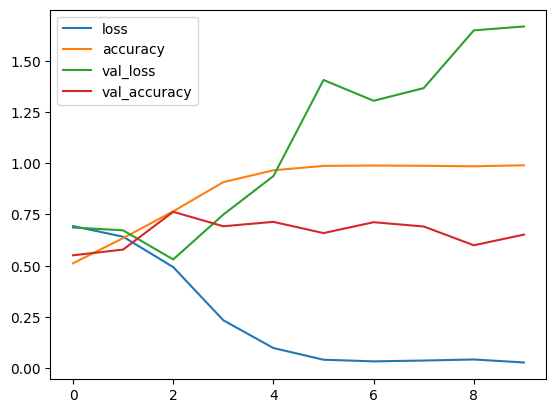

In [35]:
loss_df.plot()

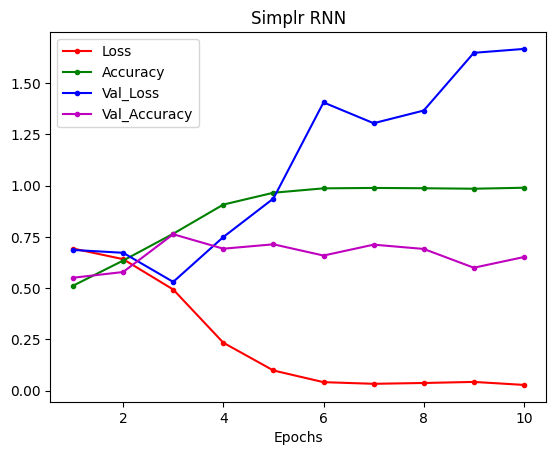

In [ ]:
plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.plot(range(1,11), history.history['loss'], color='r', label = 'Loss', marker = '.')
plt.plot(range(1,11), history.history['accuracy'], color='g', label = 'Accuracy', marker = '.')
plt.plot(range(1,11), history.history['val_loss'], color='b', label = 'Val_Loss', marker = '.')
plt.plot(range(1,11), history.history['val_accuracy'], color='m', label = 'Val_Accuracy', marker = '.')
plt.legend(loc= 'upper left')

### Bidirectional LSTM

In [37]:
from keras.layers import Bidirectional, GRU, LSTM

In [38]:
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length = max_length),
    Bidirectional(LSTM(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [39]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
history_lstm = model_lstm.fit(training_padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 58s 68ms/step - loss: 0.4631 - accuracy: 0.7708 - val_loss: 0.3841 - val_accuracy: 0.8306
Epoch 2/10
782/782 [==============================] - 52s 67ms/step - loss: 0.2803 - accuracy: 0.8867 - val_loss: 0.3882 - val_accuracy: 0.8315
Epoch 3/10
782/782 [==============================] - 51s 65ms/step - loss: 0.2121 - accuracy: 0.9209 - val_loss: 0.5245 - val_accuracy: 0.8082
Epoch 4/10
782/782 [==============================] - 51s 66ms/step - loss: 0.1600 - accuracy: 0.9422 - val_loss: 0.5620 - val_accuracy: 0.8097
Epoch 5/10
782/782 [==============================] - 51s 66ms/step - loss: 0.1146 - accuracy: 0.9592 - val_loss: 0.5655 - val_accuracy: 0.7925
Epoch 6/10
782/782 [==============================] - 51s 65ms/step - loss: 0.0742 - accuracy: 0.9762 - val_loss: 0.7404 - val_accuracy: 0.8025
Epoch 7/10
782/782 [==============================] - 51s 65ms/step - loss: 0.0645 - accuracy: 0.9780 - val_loss: 0.7804 - val_accuracy:

In [45]:
history_lstm.history

{'loss': [0.4630550742149353,
  0.28034865856170654,
  0.21206188201904297,
  0.1600458174943924,
  0.11463223397731781,
  0.07421237975358963,
  0.0644557774066925,
  0.046093929558992386,
  0.039349935948848724,
  0.03006431832909584],
 'accuracy': [0.7707599997520447,
  0.886680006980896,
  0.9208800196647644,
  0.9421600103378296,
  0.9592400193214417,
  0.9761599898338318,
  0.9779599905014038,
  0.9843999743461609,
  0.9870799779891968,
  0.9900400042533875],
 'val_loss': [0.38407695293426514,
  0.38816750049591064,
  0.5244754552841187,
  0.5619624257087708,
  0.5655060410499573,
  0.7404221296310425,
  0.7804179787635803,
  0.8791584372520447,
  1.0841394662857056,
  0.992062509059906],
 'val_accuracy': [0.8306400179862976,
  0.8314800262451172,
  0.8082399964332581,
  0.809719979763031,
  0.7925199866294861,
  0.8024799823760986,
  0.789080023765564,
  0.7989599704742432,
  0.7960399985313416,
  0.7849599719047546]}

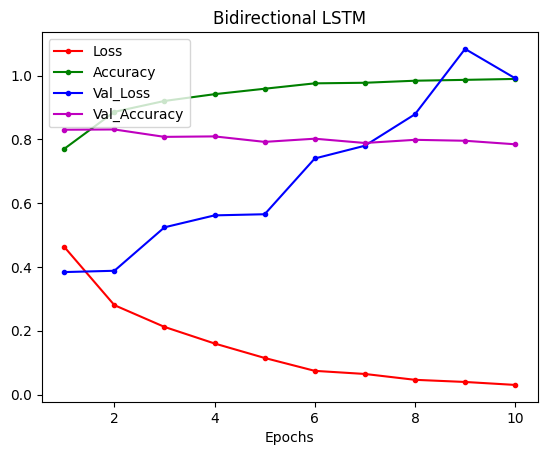

In [46]:
plt.title('Bidirectional LSTM')
plt.xlabel('Epochs')
plt.plot(range(1,11), history_lstm.history['loss'], color='r', label = 'Loss', marker = '.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color='g', label = 'Accuracy', marker = '.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color='b', label = 'Val_Loss', marker = '.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color='m', label = 'Val_Accuracy', marker = '.')
plt.legend(loc= 'upper left')

### GRU

In [47]:
model_gru = Sequential([
    Embedding(vocab_size, embedding_dim, input_length = max_length),
    Bidirectional(GRU(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [48]:
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170261 (665.08 KB)
Trainable params: 170261 (665.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model_gru.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
history_gru = model_gru.fit(training_padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 62s 73ms/step - loss: 0.4926 - accuracy: 0.7435 - val_loss: 0.3864 - val_accuracy: 0.8265
Epoch 2/10
782/782 [==============================] - 57s 72ms/step - loss: 0.2930 - accuracy: 0.8820 - val_loss: 0.3856 - val_accuracy: 0.8314
Epoch 3/10
782/782 [==============================] - 57s 72ms/step - loss: 0.2294 - accuracy: 0.9132 - val_loss: 0.5472 - val_accuracy: 0.7988
Epoch 4/10
782/782 [==============================] - 55s 71ms/step - loss: 0.1754 - accuracy: 0.9359 - val_loss: 0.4896 - val_accuracy: 0.8150
Epoch 5/10
782/782 [==============================] - 56s 72ms/step - loss: 0.1192 - accuracy: 0.9594 - val_loss: 0.5742 - val_accuracy: 0.8084
Epoch 6/10
782/782 [==============================] - 55s 70ms/step - loss: 0.0777 - accuracy: 0.9747 - val_loss: 0.6857 - val_accuracy: 0.8028
Epoch 7/10
782/782 [==============================] - 54s 69ms/step - loss: 0.0503 - accuracy: 0.9836 - val_loss: 0.8433 - val_accuracy:

In [52]:
history_gru.history

{'loss': [0.4926483929157257,
  0.2930094599723816,
  0.22935429215431213,
  0.17543289065361023,
  0.11919571459293365,
  0.07771184295415878,
  0.05028555169701576,
  0.034577589482069016,
  0.027773410081863403,
  0.020920859649777412],
 'accuracy': [0.7434800267219543,
  0.8819599747657776,
  0.9132000207901001,
  0.9358800053596497,
  0.9593999981880188,
  0.9747200012207031,
  0.9836000204086304,
  0.9881200194358826,
  0.9906399846076965,
  0.993120014667511],
 'val_loss': [0.38638293743133545,
  0.38564491271972656,
  0.5471773147583008,
  0.4895966649055481,
  0.5741791129112244,
  0.6857068538665771,
  0.843330442905426,
  1.0066596269607544,
  0.9773626327514648,
  1.1618609428405762],
 'val_accuracy': [0.8265200257301331,
  0.8314399719238281,
  0.798799991607666,
  0.8149999976158142,
  0.8083599805831909,
  0.8027600049972534,
  0.7964800000190735,
  0.8014000058174133,
  0.798520028591156,
  0.8013200163841248]}

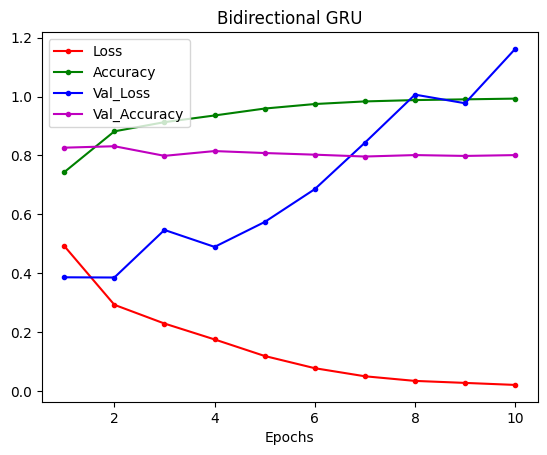

In [53]:
plt.title('Bidirectional GRU')
plt.xlabel('Epochs')
plt.plot(range(1,11), history_gru.history['loss'], color='r', label = 'Loss', marker = '.')
plt.plot(range(1,11), history_gru.history['accuracy'], color='g', label = 'Accuracy', marker = '.')
plt.plot(range(1,11), history_gru.history['val_loss'], color='b', label = 'Val_Loss', marker = '.')
plt.plot(range(1,11), history_gru.history['val_accuracy'], color='m', label = 'Val_Accuracy', marker = '.')
plt.legend(loc= 'upper left')

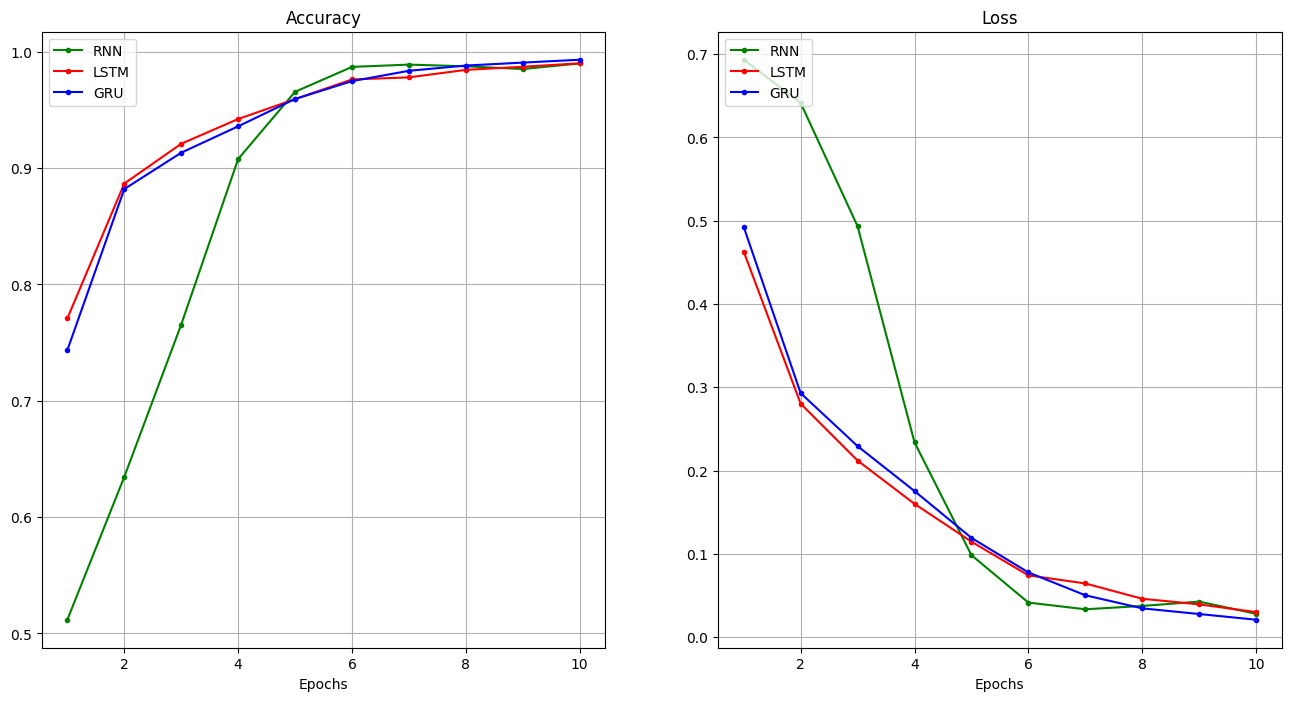

In [54]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['accuracy'], color='g', label = 'RNN', marker = '.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color='r', label = 'LSTM', marker = '.')
plt.plot(range(1,11), history_gru.history['accuracy'], color='b', label = 'GRU', marker = '.')
plt.legend(loc= 'upper left')

plt.subplot(1,2,2)
plt.title('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['loss'], color='g', label = 'RNN', marker = '.')
plt.plot(range(1,11), history_lstm.history['loss'], color='r', label = 'LSTM', marker = '.')
plt.plot(range(1,11), history_gru.history['loss'], color='b', label = 'GRU', marker = '.')
plt.legend(loc= 'upper left')

In [55]:
new1 = 'The was worst movie. Please do not watch it. Waste of mone and time.'
new2 = 'A must watch movie. I loved to watch it It was jus amazing.'

In [110]:
def predict(model,text):
  
  seq = tokenizer.texts_to_sequences([text])
  
  pad = pad_sequences(seq, maxlen=max_length, truncating=trunc_type)

  # Predict the sentiment
  yhat = model.predict(pad, verbose=False)
  percent_pos = yhat[0,0]
  
  if round(percent_pos) == 0 :
    return (1-percent_pos), 'Negative'
  return percent_pos, 'Positive'

In [111]:
predict(model_rnn, new1)

(0.9999778402489028, 'Negative')

In [112]:
predict(model_rnn, new2)

(0.9046892, 'Positive')

In [113]:
predict(model_lstm, new1)

(0.9993645308422856, 'Negative')

In [114]:
predict(model_lstm, new2)

(0.99935824, 'Positive')

In [115]:
predict(model_gru, new1)

(0.9999975133448515, 'Negative')

In [116]:
predict(model_gru, new2)

(0.9999586, 'Positive')